### Analysis of the Different Schools of Thought in the History of Philosophy

importing libraries

In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

importing data

In [2]:
data = pd.read_csv('/Users/rheasablani/Desktop/philosophy_data.csv')

In [3]:
data.head()

title author school  \
0  Plato - Complete Works  Plato  plato   
1  Plato - Complete Works  Plato  plato   
2  Plato - Complete Works  Plato  plato   
3  Plato - Complete Works  Plato  plato   
4  Plato - Complete Works  Plato  plato   

                                      sentence_spacy  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

                                        sentence_str  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

   original_publication_date  corpus_edition_date  sentence_length  \
0                       -350                 1997              125   
1                       -350                 1997               69   
2                       -350                 1997               74   
3                       -350                 1997               21   
4                       -350                 1997              101   

                                    sentence_lowered  \
0   what's new, socrates, to make you leave your ...   
1  surely you are not prosecuting anyone before t...   
2  the athenians do not call this a prosecution b...   
3                              what is this you say?   
4  someone must have indicted you, for you are no...   

                                       tokenized_txt  \
0  ['what', 'new', 'socrates', 'to', 'make', 'you...   
1  ['surely', 'you', 'are', 'not', 'prosecuting',...   
2  ['the', 'athenians', 'do', 'not', 'call', 'thi...   
3               ['what', 'is', 'this', 'you', 'say']   
4  ['someone', 'must', 'have', 'indicted', 'you',...   

                                      lemmatized_str  
0     what be new , Socrates , to make -PRON- lea...  
1   surely -PRON- be not prosecute anyone before ...  
2   the Athenians do not call this a prosecution ...  
3                          what be this -PRON- say ?  
4   someone must have indict -PRON- , for -PRON- ...

### What are the different schools of thought? What authors correspond to each?

In [4]:
print(data['school'].unique())

['plato' 'aristotle' 'empiricism' 'rationalism' 'analytic' 'continental'
 'phenomenology' 'german_idealism' 'communism' 'capitalism' 'stoicism'
 'nietzsche' 'feminism']


#### There are 13 schools of thought: Plato, Aristotle, Empiricism, Rationalism, Analytic, Continental, Phenomenology, German idealism, Communism, Capitalism, Stoicism, Nietzsche, and Feminism. 

In [5]:
plato = data[data['school'] == 'plato']
plato_author = plato['author'].unique()
print('Plato:', plato_author)

aristotle = data[data['school'] == 'aristotle']
aristotle_author = aristotle['author'].unique()
print('Aristotle:', aristotle_author)

empiricism = data[data['school'] == 'empiricism']
empiricism_author = empiricism['author'].unique()
print('Empiricism:', empiricism_author)

rationalism = data[data['school'] == 'rationalism']
rationalism_author = rationalism['author'].unique()
print('Rationalism:', rationalism_author)

analytic = data[data['school'] == 'analytic']
analytic_author = analytic['author'].unique()
print('Analytic:', analytic_author)

continental = data[data['school'] == 'continental']
continental_author = continental['author'].unique()
print('Continental:', continental_author)

phenomenology = data[data['school'] == 'phenomenology']
phenomenology_author = phenomenology['author'].unique()
print('Phenomenology:', phenomenology_author)

german_idealism = data[data['school'] == 'german_idealism']
german_idealism_author = german_idealism['author'].unique()
print('German idealism:', german_idealism_author)

communism = data[data['school'] == 'communism']
communism_author = communism['author'].unique()
print('Communism:', communism_author)

capitalism = data[data['school'] == 'capitalism']
capitalism_author = capitalism['author'].unique()
print('Capitalism:', capitalism_author)

stoicism = data[data['school'] == 'stoicism']
stoicism_author = stoicism['author'].unique()
print('Stoicism:', stoicism_author)

nietzsche = data[data['school'] == 'nietzsche']
nietzsche_author = nietzsche['author'].unique()
print('Nietzsche:', nietzsche_author)

feminism = data[data['school'] == 'feminism']
feminism_author = feminism['author'].unique()
print('Feminism:', feminism_author)

Plato: ['Plato']
Aristotle: ['Aristotle']
Empiricism: ['Locke' 'Hume' 'Berkeley']
Rationalism: ['Spinoza' 'Leibniz' 'Descartes' 'Malebranche']
Analytic: ['Russell' 'Moore' 'Wittgenstein' 'Lewis' 'Quine' 'Popper' 'Kripke']
Continental: ['Foucault' 'Derrida' 'Deleuze']
Phenomenology: ['Merleau-Ponty' 'Husserl' 'Heidegger']
German idealism: ['Kant' 'Fichte' 'Hegel']
Communism: ['Marx' 'Lenin']
Capitalism: ['Smith' 'Ricardo' 'Keynes']
Stoicism: ['Epictetus' 'Marcus Aurelius']
Nietzsche: ['Nietzsche']
Feminism: ['Wollstonecraft' 'Beauvoir' 'Davis']


In [6]:
data.groupby(['school'])[['title']].nunique('title')

title
school                
analytic            11
aristotle            1
capitalism           3
communism            3
continental          6
empiricism           6
feminism             3
german_idealism      7
nietzsche            5
phenomenology        5
plato                1
rationalism          6
stoicism             2

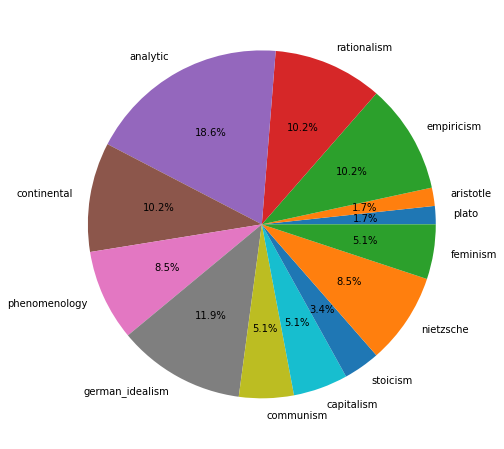

In [7]:
schools = data['school'].unique()
 
data2 = [1,1,6,6,11,6,5,7,3,3,2,5,3]

fig = plt.figure(figsize =(10, 8))
plt.pie(data2, labels = schools,autopct='%1.1f%%') 
plt.show()

#### There are a greater number of texts corresponding to the Analytic and German Idealism schools of thought and fewer number of texts related to Aristotle and Plato. Note, however, that this is not a reflection of how much the authors contributed since it only shows number of titles and not length of work/titles. 

### How many years were there published texts for each school of thought?

In [8]:
earliest = data.groupby(['school'])[['original_publication_date']].min()
earliest

original_publication_date
school                                    
analytic                              1910
aristotle                             -320
capitalism                            1776
communism                             1848
continental                           1961
empiricism                            1689
feminism                              1792
german_idealism                       1781
nietzsche                             1886
phenomenology                         1907
plato                                 -350
rationalism                           1637
stoicism                               125

In [9]:
schools_of_thought_date1 = data.groupby(['school'])[['original_publication_date']].min()
schools_of_thought_date2 = data.groupby(['school'])[['original_publication_date']].max()
diff = schools_of_thought_date2 - schools_of_thought_date1

In [10]:
diff

original_publication_date
school                                    
analytic                                75
aristotle                                0
capitalism                             160
communism                               35
continental                             11
empiricism                              90
feminism                               189
german_idealism                         39
nietzsche                                2
phenomenology                           43
plato                                    0
rationalism                             73
stoicism                                45

<AxesSubplot:title={'center':'Duration length for each School of Thought'}, ylabel='School of thought'>

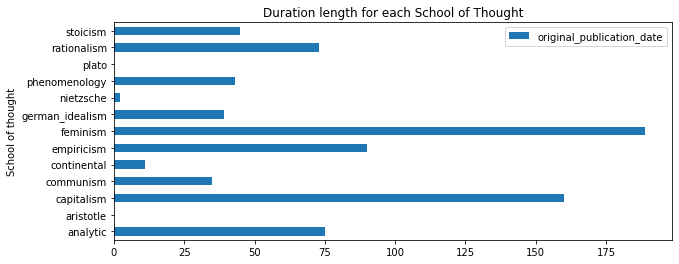

In [11]:
diff.plot(kind='barh', title='Duration length for each School of Thought', ylabel='original publication date',
         xlabel='School of thought', figsize=(10, 4))

#### The earliest philosphers were Plato and Aristotle, publishing in 350 BCE and 320 BCE respectively. Texts pertaining to Feminism, Capitalism, and Empiricism have been around the longest.

### What is the average sentence length for each school of thought?

In [12]:
sen_len = data.groupby(['school'])['sentence_length'].mean()
sen_len

school
analytic           119.025205
aristotle          153.224953
capitalism         187.576289
communism          152.752311
continental        171.792060
empiricism         183.638051
feminism           153.083928
german_idealism    180.251329
nietzsche          116.599867
phenomenology      145.913345
plato              114.938018
rationalism        163.958996
stoicism           137.056410
Name: sentence_length, dtype: float64

<AxesSubplot:title={'center':'Average Sentence Length for each School of Thought'}, xlabel='School of thought', ylabel='Sentence length'>

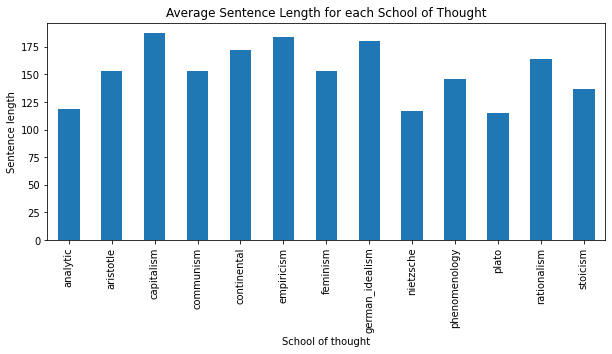

In [13]:
sen_len.plot(kind='bar', title='Average Sentence Length for each School of Thought', ylabel='Sentence length',
         xlabel='School of thought', figsize=(10, 4))

### 

#### Capitalism, Empiricism, and German idealism texts have higher average sentence lengths compared to the other schools of thought. On average, Plato and Nietzsche wrote shorter sentences.

### What words appear more frequently in the texts for each school of thought?

In [14]:
text1 = data[data.school=='stoicism'].sentence_str.tolist() 
text1 = ' '.join(text1).lower()
wordcloud1 = WordCloud(stopwords = STOPWORDS,
                      collocations=False,min_word_length=3, collocation_threshold=3, background_color='white').generate(text1)

text2 = data[data.school=='nietzsche'].sentence_str.tolist() 
text2 = ' '.join(text2).lower()
wordcloud2 = WordCloud(stopwords = STOPWORDS,
                      collocations=False,min_word_length=3, collocation_threshold=3, background_color='white').generate(text2)

text3 = data[data.school=='communism'].sentence_str.tolist() 
text3 = ' '.join(text3).lower()
wordcloud3 = WordCloud(stopwords = STOPWORDS,
                      collocations=False,min_word_length=3, collocation_threshold=3, background_color='white').generate(text3)

text4 = data[data.school=='capitalism'].sentence_str.tolist() 
text4 = ' '.join(text4).lower()
wordcloud4 = WordCloud(stopwords = STOPWORDS,
                      collocations=False,min_word_length=3, collocation_threshold=3, background_color='white').generate(text4)

text5 = data[data.school=='feminism'].sentence_str.tolist() 
text5 = ' '.join(text5).lower()
wordcloud5 = WordCloud(stopwords = STOPWORDS,
                      collocations=False,min_word_length=3, collocation_threshold=3, background_color='white').generate(text5)

text6 = data[data.school=='empiricism'].sentence_str.tolist() 
text6 = ' '.join(text6).lower()
wordcloud6 = WordCloud(stopwords = STOPWORDS,
                      collocations=False,min_word_length=3, collocation_threshold=3, background_color='white').generate(text6)

text7 = data[data.school=='rationalism'].sentence_str.tolist() 
text7 = ' '.join(text7).lower()
wordcloud7 = WordCloud(stopwords = STOPWORDS,
                      collocations=False,min_word_length=3, collocation_threshold=3, background_color='white').generate(text7)

text8 = data[data.school=='phenomenology'].sentence_str.tolist() 
text8 = ' '.join(text8).lower()
wordcloud8 = WordCloud(stopwords = STOPWORDS,
                      collocations=False,min_word_length=3, collocation_threshold=3, background_color='white').generate(text8)

text9 = data[data.school=='continental'].sentence_str.tolist() 
text9 = ' '.join(text9).lower()
wordcloud9 = WordCloud(stopwords = STOPWORDS,
                      collocations=False,min_word_length=3, collocation_threshold=3, background_color='white').generate(text9)

text10 = data[data.school=='plato'].sentence_str.tolist() 
text10 = ' '.join(text10).lower()
wordcloud10 = WordCloud(stopwords = STOPWORDS,
                      collocations=False,min_word_length=3, collocation_threshold=3, background_color='white').generate(text10)

text11 = data[data.school=='german_idealism'].sentence_str.tolist() 
text11 = ' '.join(text11).lower()
wordcloud11 = WordCloud(stopwords = STOPWORDS,
                      collocations=False,min_word_length=3, collocation_threshold=3, background_color='white').generate(text11)

text12 = data[data.school=='aristotle'].sentence_str.tolist() 
text12 = ' '.join(text12).lower()
wordcloud12 = WordCloud(stopwords = STOPWORDS,
                      collocations=False,min_word_length=3, collocation_threshold=3, background_color='white').generate(text12)

text13 = data[data.school=='analytic'].sentence_str.tolist() 
text13 = ' '.join(text13).lower()
wordcloud13 = WordCloud(stopwords = STOPWORDS,
                      collocations=False,min_word_length=3, collocation_threshold=3, background_color='white').generate(text13)


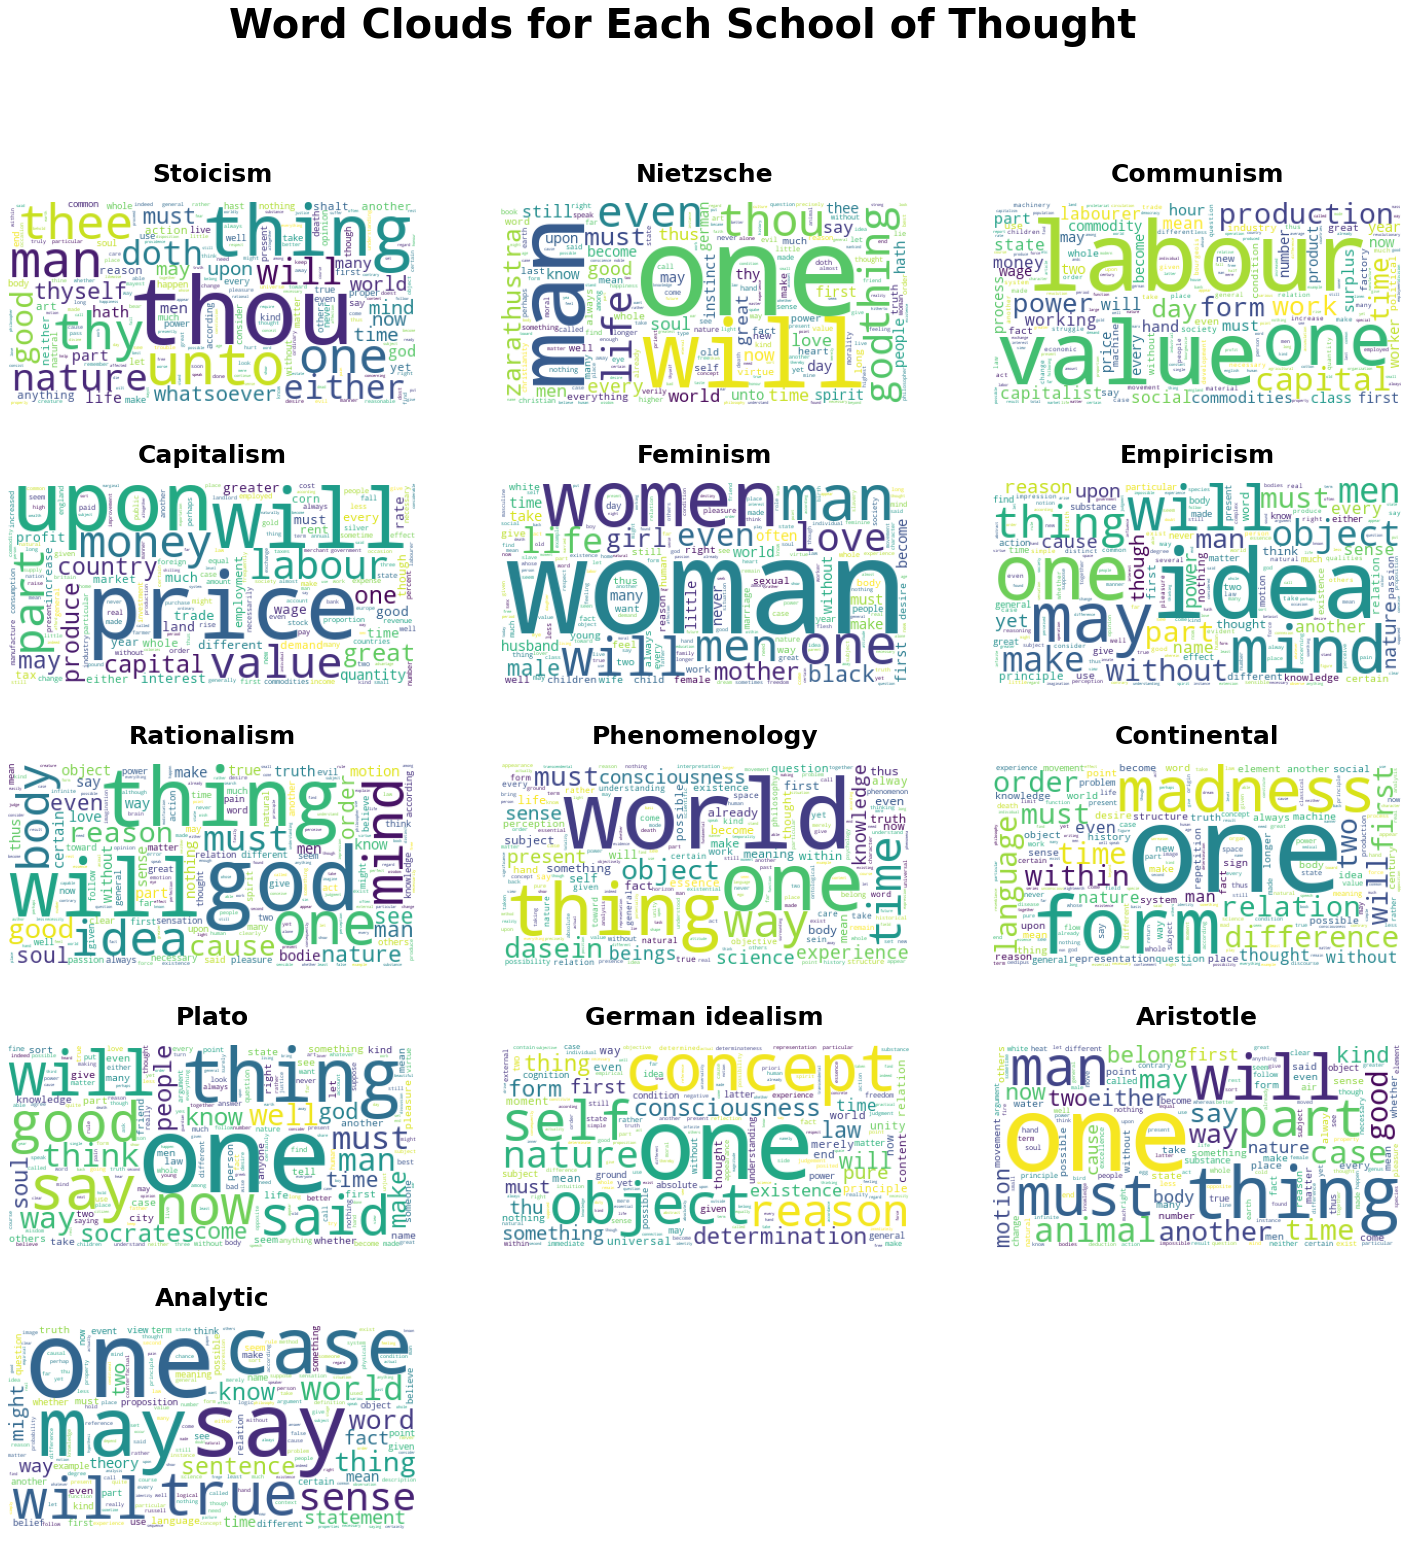

In [15]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15)) = plt.subplots(5, 3, figsize=(25, 25))
fig.suptitle('Word Clouds for Each School of Thought', size=40, fontweight='bold')
ax1.imshow(wordcloud1)
ax1.set_title('Stoicism', size=25, pad=20, fontweight='bold')
ax2.imshow(wordcloud2)
ax2.set_title('Nietzsche', size=25, pad=20, fontweight='bold')
ax3.imshow(wordcloud3)
ax3.set_title('Communism', size=25, pad=20, fontweight='bold')
ax4.imshow(wordcloud4)
ax4.set_title('Capitalism', size=25, pad=20, fontweight='bold')
ax5.imshow(wordcloud5)
ax5.set_title('Feminism', size=25, pad=20, fontweight='bold')
ax6.imshow(wordcloud6)
ax6.set_title('Empiricism', size=25, pad=20, fontweight='bold')
ax7.imshow(wordcloud7)
ax7.set_title('Rationalism', size=25, pad=20, fontweight='bold')
ax8.imshow(wordcloud8)
ax8.set_title('Phenomenology', size=25, pad=20, fontweight='bold')
ax9.set_title('Continental', size=25, pad=20, fontweight='bold')
ax9.imshow(wordcloud9)
ax10.set_title('Plato', size=25, pad=20, fontweight='bold')
ax10.imshow(wordcloud10)
ax11.set_title('German idealism', size=25, pad=20, fontweight='bold')
ax11.imshow(wordcloud11)
ax12.set_title('Aristotle', size=25, pad=20, fontweight='bold')
ax12.imshow(wordcloud12)
ax13.set_title('Analytic', size=25, pad=20, fontweight='bold')
ax13.imshow(wordcloud13)

for ax in fig.axes:
    ax.axis('off')
plt.show()

#### As expected, these word clouds align with the beleifs and principles for each school of thought. However, there are some words such as "thing" and "one" that although provide some insight into the school of thought, may hinder one from fully understanding and characterizing the different schools of thought

### Word clouds extension - min word length = 5 & removing thing

In [16]:
stop_words = ["thing", "things"] + list(STOPWORDS)

In [17]:
text1 = data[data.school=='stoicism'].sentence_str.tolist() 
text1 = ' '.join(text1).lower()
wordcloud1 = WordCloud(stopwords = stop_words,
                      min_word_length=5, collocations=False, background_color='white').generate(text1)

text2 = data[data.school=='nietzsche'].sentence_str.tolist() 
text2 = ' '.join(text2).lower()
wordcloud2 = WordCloud(stopwords = stop_words,
                      collocations=False,min_word_length=5, collocation_threshold=3, background_color='white').generate(text2)

text3 = data[data.school=='communism'].sentence_str.tolist() 
text3 = ' '.join(text3).lower()
wordcloud3 = WordCloud(stopwords = stop_words,
                      collocations=False,min_word_length=5, collocation_threshold=3, background_color='white').generate(text3)

text4 = data[data.school=='capitalism'].sentence_str.tolist() 
text4 = ' '.join(text4).lower()
wordcloud4 = WordCloud(stopwords = stop_words,
                      collocations=False,min_word_length=5, collocation_threshold=3, background_color='white').generate(text4)

text5 = data[data.school=='feminism'].sentence_str.tolist() 
text5 = ' '.join(text5).lower()
wordcloud5 = WordCloud(stopwords = stop_words,
                      collocations=False,min_word_length=5, collocation_threshold=3, background_color='white').generate(text5)

text6 = data[data.school=='empiricism'].sentence_str.tolist() 
text6 = ' '.join(text6).lower()
wordcloud6 = WordCloud(stopwords = stop_words,
                      collocations=False,min_word_length=5, collocation_threshold=3, background_color='white').generate(text6)

text7 = data[data.school=='rationalism'].sentence_str.tolist() 
text7 = ' '.join(text7).lower()
wordcloud7 = WordCloud(stopwords = stop_words,
                      collocations=False,min_word_length=5, collocation_threshold=3, background_color='white').generate(text7)

text8 = data[data.school=='phenomenology'].sentence_str.tolist() 
text8 = ' '.join(text8).lower()
wordcloud8 = WordCloud(stopwords = stop_words,
                      collocations=False,min_word_length=5, collocation_threshold=3, background_color='white').generate(text8)

text9 = data[data.school=='continental'].sentence_str.tolist() 
text9 = ' '.join(text9).lower()
wordcloud9 = WordCloud(stopwords = stop_words,
                      collocations=False,min_word_length=5, collocation_threshold=3, background_color='white').generate(text9)

text10 = data[data.school=='plato'].sentence_str.tolist() 
text10 = ' '.join(text10).lower()
wordcloud10 = WordCloud(stopwords = stop_words,
                      collocations=False,min_word_length=5, collocation_threshold=3, background_color='white').generate(text10)

text11 = data[data.school=='german_idealism'].sentence_str.tolist() 
text11 = ' '.join(text11).lower()
wordcloud11 = WordCloud(stopwords = stop_words,
                      collocations=False,min_word_length=5, collocation_threshold=3, background_color='white').generate(text11)

text12 = data[data.school=='aristotle'].sentence_str.tolist() 
text12 = ' '.join(text12).lower()
wordcloud12 = WordCloud(stopwords = stop_words,
                      collocations=False,min_word_length=5, collocation_threshold=3, background_color='white').generate(text12)

text13 = data[data.school=='analytic'].sentence_str.tolist() 
text13 = ' '.join(text13).lower()
wordcloud13 = WordCloud(stopwords = stop_words,
                      collocations=False,min_word_length=5, collocation_threshold=3, background_color='white').generate(text13)


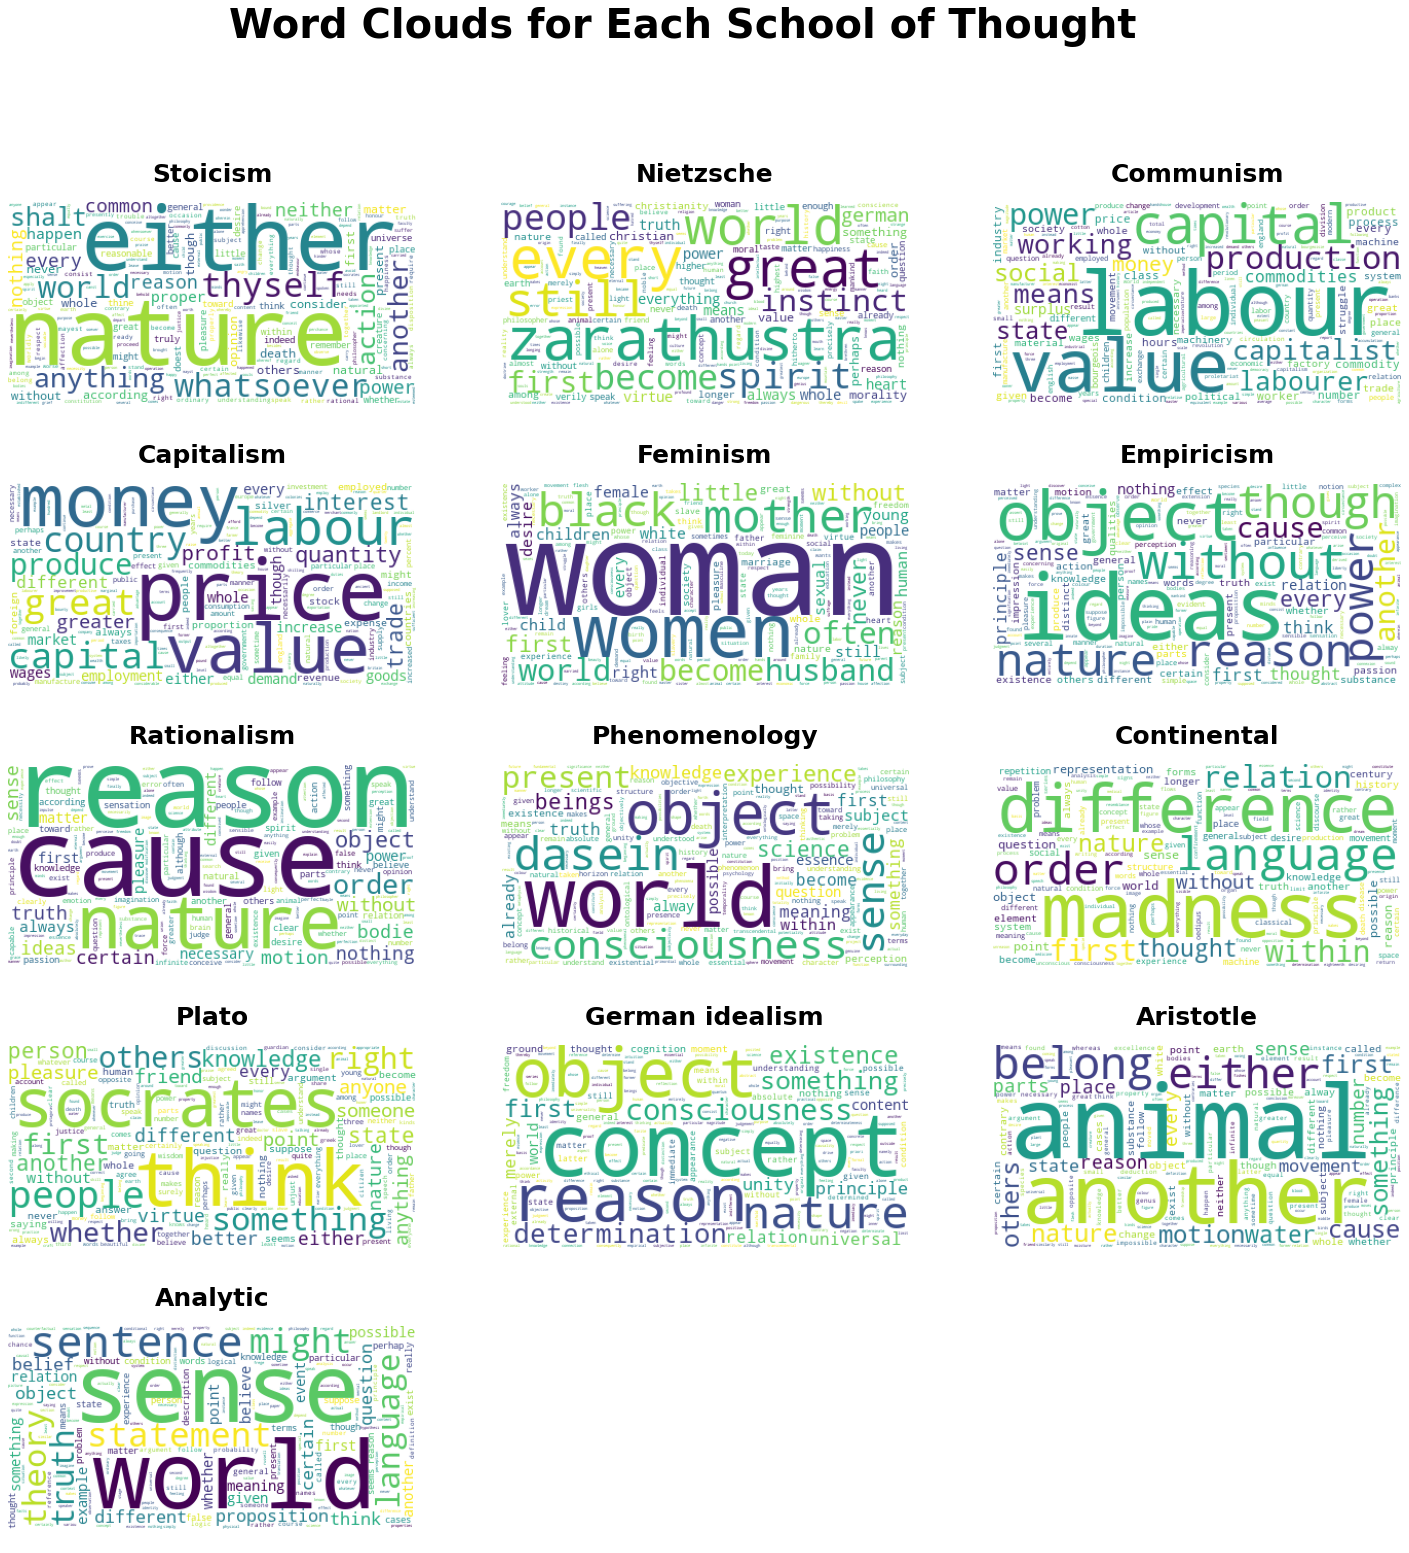

In [18]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15)) = plt.subplots(5, 3, figsize=(25, 25))
fig.suptitle('Word Clouds for Each School of Thought', size=40, fontweight='bold')
ax1.imshow(wordcloud1)
ax1.set_title('Stoicism', size=25, pad=20, fontweight='bold')
ax2.imshow(wordcloud2)
ax2.set_title('Nietzsche', size=25, pad=20, fontweight='bold')
ax3.imshow(wordcloud3)
ax3.set_title('Communism', size=25, pad=20, fontweight='bold')
ax4.imshow(wordcloud4)
ax4.set_title('Capitalism', size=25, pad=20, fontweight='bold')
ax5.imshow(wordcloud5)
ax5.set_title('Feminism', size=25, pad=20, fontweight='bold')
ax6.imshow(wordcloud6)
ax6.set_title('Empiricism', size=25, pad=20, fontweight='bold')
ax7.imshow(wordcloud7)
ax7.set_title('Rationalism', size=25, pad=20, fontweight='bold')
ax8.imshow(wordcloud8)
ax8.set_title('Phenomenology', size=25, pad=20, fontweight='bold')
ax9.set_title('Continental', size=25, pad=20, fontweight='bold')
ax9.imshow(wordcloud9)
ax10.set_title('Plato', size=25, pad=20, fontweight='bold')
ax10.imshow(wordcloud10)
ax11.set_title('German idealism', size=25, pad=20, fontweight='bold')
ax11.imshow(wordcloud11)
ax12.set_title('Aristotle', size=25, pad=20, fontweight='bold')
ax12.imshow(wordcloud12)
ax13.set_title('Analytic', size=25, pad=20, fontweight='bold')
ax13.imshow(wordcloud13)

for ax in fig.axes:
    ax.axis('off')
plt.show()

#### Upon the increasing minimum word length and adding more stopwords, these word clouds better represent the beliefs and principles of each school of thought.

#### Stoicism encourages individuals to hone their virtues of character and either maximize positive emotions or reduce negative emotions so the most frequently appearing words -nature, thyself, either make sense.

#### Nietzsche believed that there aren't rules for human life so theso the most frequently appearing words -spirit, world, great, instinct are fitting. The frequency of "zarathrustra" was also interesting but upon further research it was found that Nietzsche wrote a text titled "Thus Spake Zarathrustra".

#### The most frequently appearing words for Communism are labour, capital, and value which is fitting since Communism is centered around creating a classless society where major means of production are controlled by the public.

#### Capitalism is characterized by private ownership, competition, and freedom of choice so the so the most frequently appearing words -money, price, value, labour are appropriate.

#### The most frequently appearing words for Feminism -woman, women, mother, are suitable since feminism is the belief in full social, economic, and political equality for all women.

#### Empiricism is a view that origin of all knowledge is sense experience so it makes sense that the most frequently appearing words are reason, object, and ideas.

#### Rationalism regards reason as the main source and test of knowledge so the most frequently appearing words -nature, reason, cause, are suitable.

#### Phenomenology describes the structures of experience and consciousness so it is appropriate that the most frequently appearing words are world, sense, and consciousness.

#### Continental philosophy has themes of history and politics and is characterized by self-consciousness, freedom, desire so it was interesting to see that the most frequently appearing words are madness, language, and difference.

#### Plato was a student of Socrates and most famous philosophy was the idea of materialism so it is fitting that the most frequently appearing words are socarates, think, and something.

#### German idealists beleived that nothing exists without the mind so the most commonly appearing words -concept, object, and reason make sense.

#### Aristotle's philosophy stresses biology  and he beleived that the world was substances and species so it is appropriate that the most commonly appearing words are animal and nature.

#### Analytic philosophy is characterized by the study of language and logical analysis of concepts so it is fitting that the most frequently appearing words are sense, sentence, and world.

### Conclusion

### Each school of thought is characterized by its own principles and beliefs and word clouds were a good visual representation of this. However, there is overlap in the vocabularly used in each school of thought. This makes sense as some schools of thought have similar beliefs and others often reference other philosophies to make comparisons and contrasts.